In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [4]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
print('Customers Dataset')
customers.info()
customers.head()

Customers Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
print('Products Dataset')
products.info()
products.head()

Products Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
print('Transactions Dataset')
transactions.info()
transactions.head()

Transactions Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
# Checking Missing Value
print('Customers Missing value\n', customers.isnull().sum())
print('\nProducts Missing Value\n', products.isnull().sum())
print('\nTransactions Missing value\n', transactions.isnull().sum())

Customers Missing value
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Missing Value
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions Missing value
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
# Converting date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

In [10]:
# Checking Duplicate rows
print('Duplicate Rows in Customers\n', customers.duplicated().sum())
print('\nDuplicate Rows in Products\n', products.duplicated().sum())
print('\nDuplicate Rows in Transactions\n', transactions.duplicated().sum())

Duplicate Rows in Customers
 0

Duplicate Rows in Products
 0

Duplicate Rows in Transactions
 0


In [11]:
# Descriptive Statistics
print('Descriptive Statistics for Transactions:')
print(transactions[['Quantity', 'TotalValue', 'Price']].describe())

Descriptive Statistics for Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


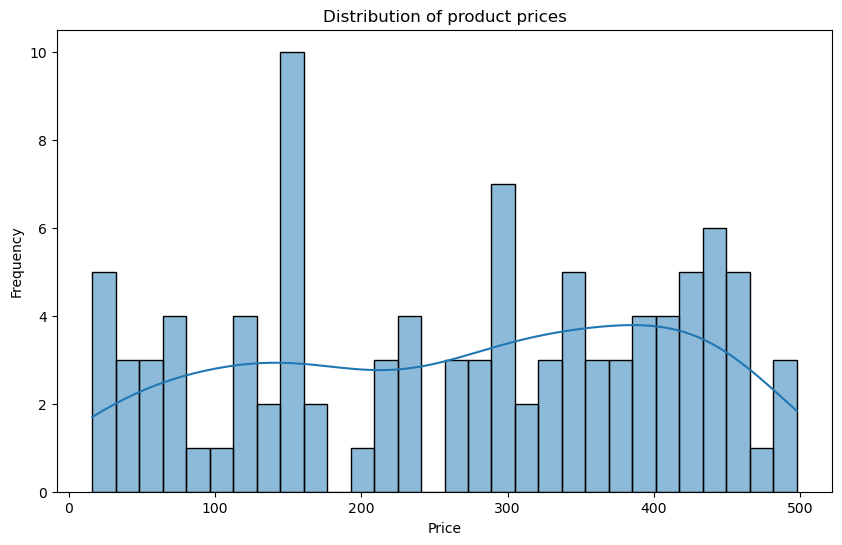

In [12]:
# Visualization
# Distribution of product prices
plt.figure(figsize=(10,6))
sns.histplot(products['Price'], kde = True, bins=30)
plt.title('Distribution of product prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

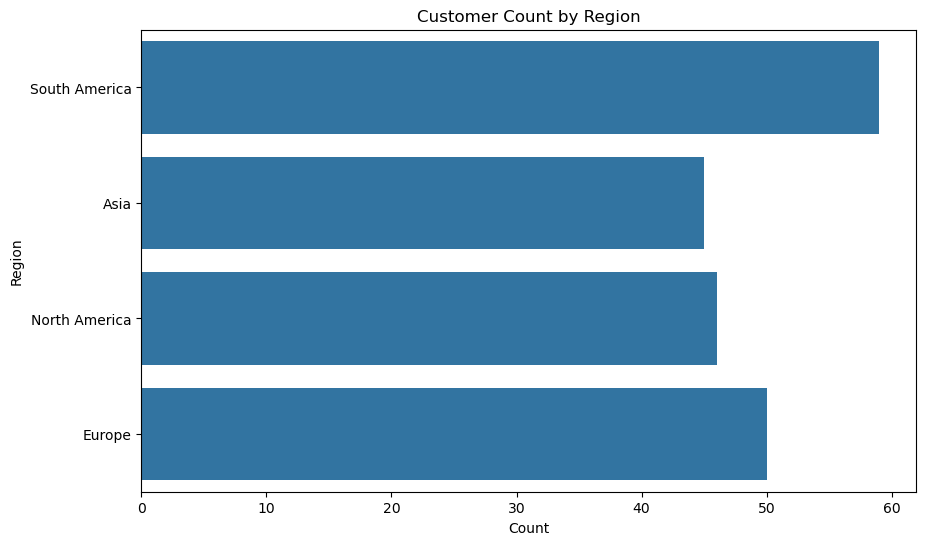

In [13]:
# Region-wise customers count
plt.figure(figsize=(10,6))
sns.countplot(y=customers['Region'])
plt.title('Customer Count by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

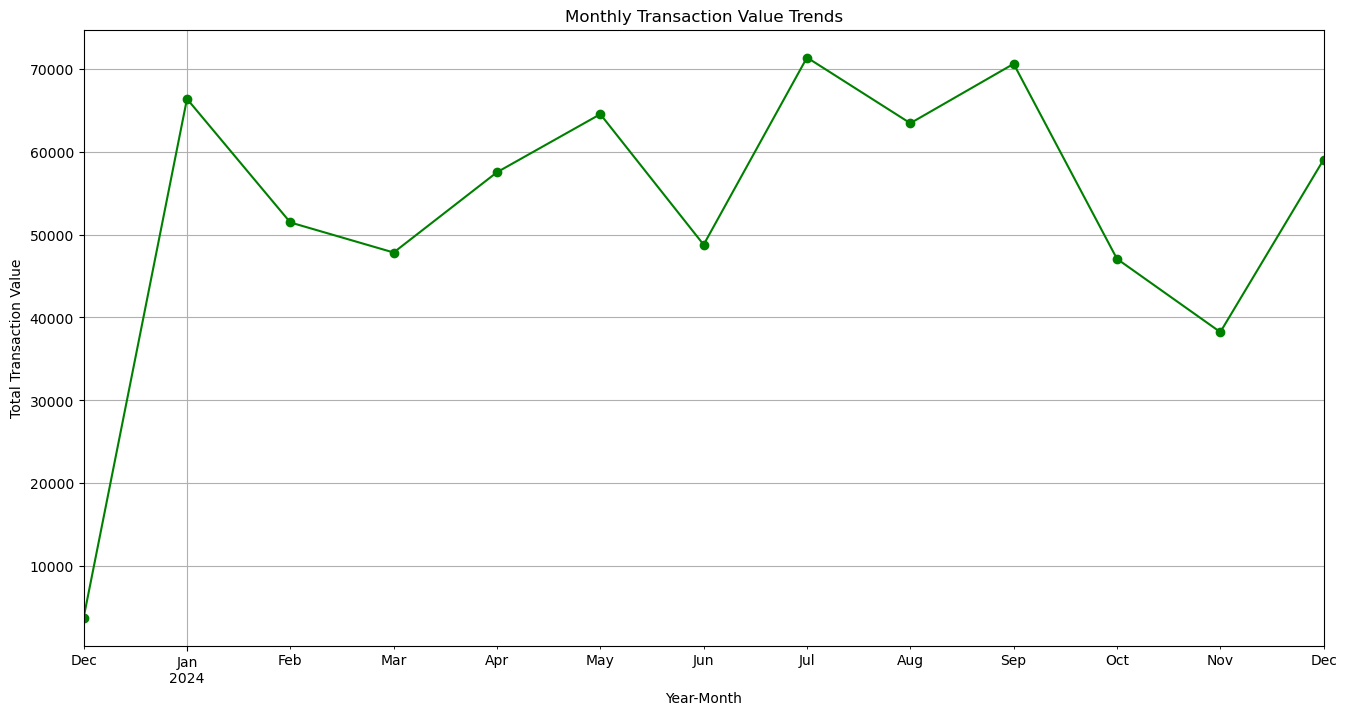

In [14]:
# Time series analysis
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
transaction_trends = transactions.groupby('YearMonth')['TotalValue'].sum()

plt.figure(figsize=(16,8))
transaction_trends.plot(marker='o', color='green')
plt.title('Monthly Transaction Value Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Transaction Value')
plt.grid()
plt.show()

In [16]:
# Merging Dataset to create feature set
merged_data = transactions.merge(customers, on = 'CustomerID').merge(products, on='ProductID')

In [20]:
# Check the merged data structure
print(merged_data.head())
print(merged_data.columns)

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x YearMonth     CustomerName         Region SignupDate  \
0      300.68   300.68   2024-08   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68   2024-05  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68   2024-04  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68   2024-03  Travis Campbell  South America 2024-04-11   
4      902.04   300.68   2024-03    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electroni

In [21]:
# Creating features for the model
features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_x': 'mean',
    'Region': 'first'
}).reset_index()

In [24]:
# Normalizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['TotalValue', 'Quantity', 'Price_x']])

In [25]:
# Calculate similarity scores
similarity_matrix = cosine_similarity(scaled_features)

In [27]:
# Create a function to get top 3 lookalikes
def get_lookalikes(customer_id, top_n=3):
    customer_index = features[features['CustomerID'] == customer_id].index[0]
    similar_indices = similarity_matrix[customer_index].argsort()[-top_n-1:-1][::-1]
    similar_customers = features.iloc[similar_indices]
    return similar_customers[['CustomerID', 'TotalValue']].assign(SimilarityScore=similarity_matrix[customer_index][similar_indices])

In [38]:
lookalike_results = {}
for customer in features['CustomerID'].head(20):
    lookalike_results[customer] = get_lookalikes(customer)

In [39]:
# Create a list to hold the lookalike data
lookalike_data = []

In [40]:
# Populate the list with customer ID, lookalike ID, and similarity score
for customer_id, lookalikes in lookalike_results.items():
    for index, row in lookalikes.iterrows():
        lookalike_data.append({
            'CustomerID': customer_id,
            'LookalikeID': row['CustomerID'],
            'SimilarityScore': row['SimilarityScore']
        })


In [41]:
# Convert the list to a DataFrame
lookalike_df = pd.DataFrame(lookalike_data)

In [42]:
# Save results to CSV
lookalike_df.to_csv('Prathamesh_Jadhao_Lookalike.csv', index=False)